# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [1]:
import pandas as pd
import numpy as np

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']


## Continuous Features

In [11]:
def normalize(data):
    return (data - data.mean())/data.std()

In [50]:
# Log transform and normalize
ames_log = pd.DataFrame([])
ames_log['log_LotArea'] = np.log(ames['LotArea'])
ames_log['log_1stFlrSF'] = np.log(ames['1stFlrSF'])
ames_log['log_GrLivArea'] = np.log(ames['GrLivArea'])
ames_log['log_SalePrice'] = np.log(ames['SalePrice'])

ames_fin = pd.DataFrame([])
ames_fin = ames_log.apply(normalize)
ames_fin.columns = continuous



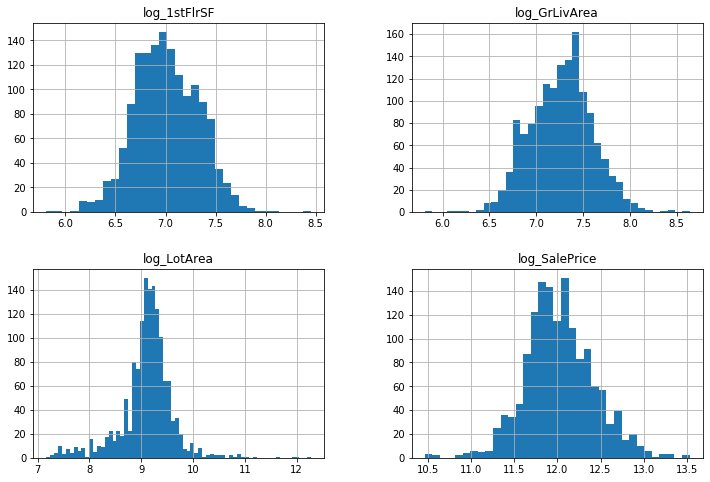

In [51]:
ames_log.hist(bins='auto', figsize=(12,8));

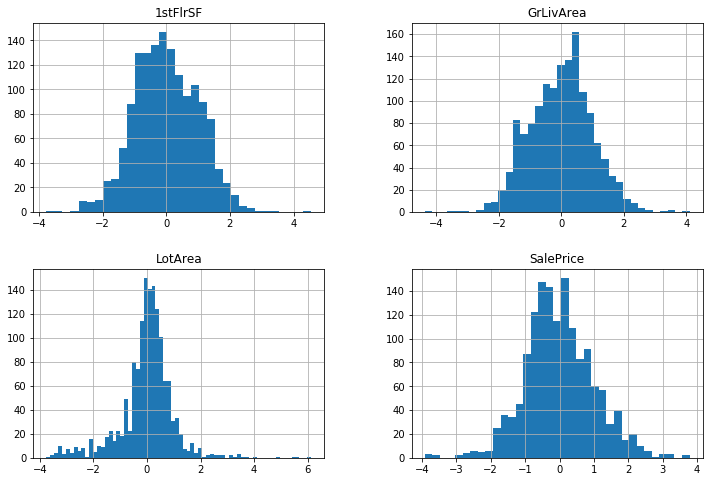

In [52]:
ames_fin.hist(bins='auto', figsize=(12,8));

## Categorical Features

In [53]:
# One hot encode categoricals
ames_dummies = pd.get_dummies(ames[categoricals], drop_first=True)
ames_dummies

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Combine Categorical and Continuous Features

In [54]:
# combine features into a single dataframe called preprocessed
ames_processed = pd.concat([ames_fin, ames_dummies], axis=1, sort=False)
# ames_processed.drop('SalePrice', axis=1, inplace=True)

In [55]:
ames_processed.rename(columns={'1stFlrSF':'FirstFlrSF'}, inplace=True)

In [56]:
list(ames_processed.columns)

['LotArea',
 'FirstFlrSF',
 'GrLivArea',
 'SalePrice',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker

## Run a linear model with SalePrice as the target variable in statsmodels

In [57]:
from statsmodels.formula.api import ols

In [60]:
# Your code here
outcome = 'SalePrice'
x_cols = list(ames_processed.drop('SalePrice', axis=1).columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=ames_processed).fit()
model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x1a276c5eb8>>

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:58:11   Log-Likelihood:                -738.14
No. Observations:                1460   AIC:                             1572.
Df Residuals:                    1412   BIC:                             1826.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1317      0.263     -0.500      0.617      -0.648       0.385
LotArea                  0.1033      0.019      5.475      0.000       0.066       0.140
FirstFlrSF               0.1371      0.016      8.584      0.000       0.106       0.168
GrLivArea                0.3768      0.016     24.114      0.000       0.346       0.407
BldgType_2fmCon         -0.1715      0.079     -2.173      0.030      -0.326      -0.017
BldgType_Duplex         -0.4203      0.062     -6.813      0.000      -0.541      -0.299
BldgType_Twnhs          -0.1403      0.093     -1.513      0.130      -0.322       0.042
BldgType_TwnhsE         -0.0512      0.060     -0.858      0.391      -0.168       0.066
KitchenQual_Fa          -0.9999      0.088    -11.315      0.000      -1.173      -0.827
KitchenQual_Gd          -0.3820      0.050     -7.613      0.000      -0.480      -0.284
KitchenQual_TA          -0.6692      0.055    -12.111      0.000      -0.778      -0.561
SaleType_CWD             0.2285      0.215      1.061      0.289      -0.194       0.651
SaleType_Con             0.5861      0.304      1.927      0.054      -0.010       1.183
SaleType_ConLD           0.3151      0.155      2.029      0.043       0.010       0.620
SaleType_ConLI           0.0331      0.195      0.169      0.865      -0.350       0.416
SaleType_ConLw           0.0161      0.196      0.082      0.935      -0.368       0.400
SaleType_New             0.2999      0.079      3.803      0.000       0.145       0.455
SaleType_Oth             0.1178      0.245      0.480      0.631      -0.364       0.599
SaleType_WD              0.1748      0.065      2.676      0.008       0.047       0.303
MSZoning_FV              1.0666      0.193      5.526      0.000       0.688       1.445
MSZoning_RH              0.8768      0.194      4.512      0.000       0.496       1.258
MSZoning_RL              0.9961      0.162      6.151      0.000       0.678       1.314
MSZoning_RM              1.1023      0.152      7.264      0.000       0.805       1.400
Street_Pave             -0.2131      0.180     -1.182      0.237      -0.567       0.141
Neighborhood_Blueste     0.0529      0.318      0.167      0.868      -0.571       0.677
Neighborhood_BrDale     -0.4627      0.171     -2.711      0.007      -0.798      -0.128
Neighborhood_BrkSide    -0.6498      0.137     -4.735      0.000      -0.919      -0.381
Neighborhood_ClearCr    -0.2102      0.144     -1.456      0.146      -0.493       0.073
Neighborhood_CollgCr    -0.0761      0.119     -0.641      0.522      -0.309       0.157
Neighborhood_Crawfor    -0.0823      0.129     -0.638      0.523      -0.335       0.171
Neighborhood_Edwards    -0.7613      0.124     -6.143      0.000      -1.004      -0.518
Neighborhood_Gilbert    -0.0980      0.126     -0.777    

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
y_pred = model.predict(ames_processed.drop('SalePrice', axis=1))

In [82]:
y_pred = y_pred*ames['SalePrice'].std()+ames['SalePrice'].mean()

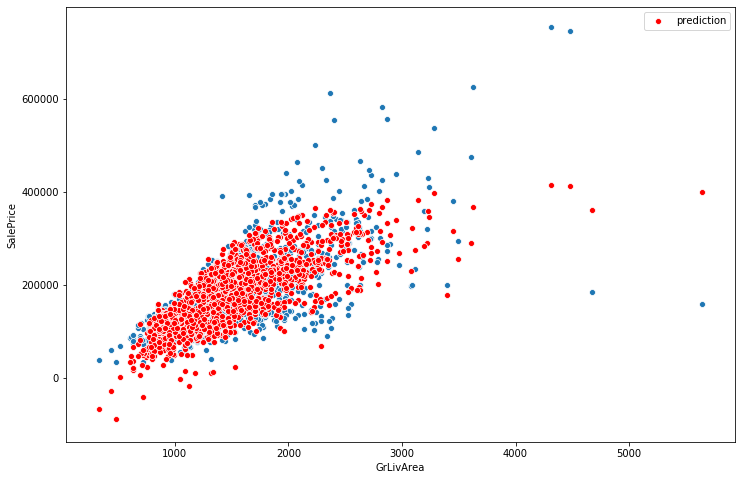

In [90]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(ames['GrLivArea'],ames['SalePrice'], ax=ax)
sns.scatterplot(x=ames['GrLivArea'], y=y_pred, color='r', label='prediction', ax=ax)
plt.legend()


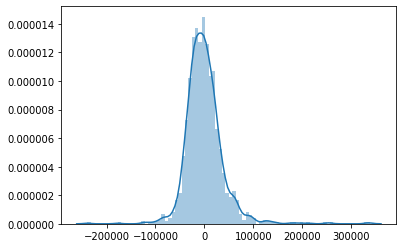

In [97]:
sns.distplot(ames['SalePrice']-y_pred, bins='auto')

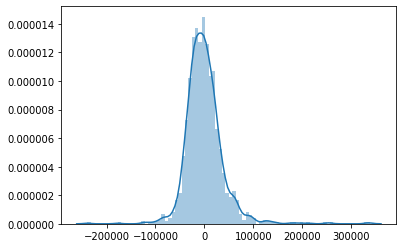

In [99]:
sns.distplot(ames['SalePrice']-y_pred, bins='auto')

AttributeError: 'Line2D' object has no property 'density'

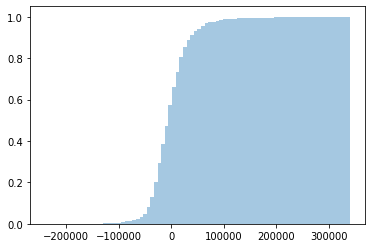

In [103]:
kwargs = {'cumulative': True}
sns.distplot(ames['SalePrice']-y_pred, bins='auto',
             hist_kws=kwargs,
             kde_kws=kwargs)

## Run the same model in scikit-learn

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
y = ames_processed['SalePrice']
linreg = LinearRegression()

In [65]:
linreg.fit(ames_processed.drop('SalePrice', axis=1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
linreg.coef_

array([ 0.10327192,  0.1371289 ,  0.37682133, -0.1714623 , -0.42033885,
       -0.14034113, -0.05120194, -0.99986001, -0.38202198, -0.66924909,
        0.22847737,  0.5860786 ,  0.31510567,  0.0330941 ,  0.01608664,
        0.29985338,  0.11784232,  0.17480326,  1.06663561,  0.87681007,
        0.99609131,  1.10228499, -0.21311107,  0.05293276, -0.46271253,
       -0.64982261, -0.21019239, -0.07609253, -0.08233633, -0.76126683,
       -0.09799942, -0.96183328, -0.69182575, -0.2553217 , -0.44067351,
       -0.01595046, -0.26762962,  0.36313165,  0.36259667, -0.93504972,
       -0.69976325, -0.47543141, -0.23309732,  0.09502969,  0.42957077,
        0.0056924 ,  0.12762613])

In [67]:
linreg.intercept_

-0.1316973691667042

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

In [118]:
zeros = np.zeros((1,ames_processed.shape[1]))

In [119]:
zeros

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [120]:
ames_test = pd.DataFrame(zeros)
ames_test.columns = list(ames_processed.columns)

In [121]:
test = {'LotArea': 14977
'1stFlrSF': 1976
'GrLivArea': 1976
1Fam
'KitchenQual': Gd
'SaleType': New
'MSZoning': RL
'Street': Pave
'Neighborhood': NridgHt}

,LotArea,FirstFlrSF,GrLivArea,SalePrice,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!